# Lista 4

## Kod

Importowanie bibliotek

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from PIL import Image
from IPython.display import display
import math
from scipy.stats import t as tp
from scipy.stats import ttest_ind,shapiro,wilcoxon,mannwhitneyu


Ciągi z listy 2 :

In [523]:
a2 = np.array([-0.14335748,  0.22153917,  0.6655269 ,  0.93849878,  0.24881592,
        0.65024363, -0.22429572,  0.29916765,  0.75219736, -0.1400177 ,
       -0.80039457, -0.22213638,  0.64621912,  0.80456221,  0.09150028])

In [524]:
b2 = np.array([-0.02139339, -0.29600124, -0.16515948, -0.99162205,  0.86609319,
       -0.78645936,  0.11165304, -0.57071602,  0.10879712, -0.10327371,
       -0.09394961, -0.21043858,  0.85068842,  0.5974826 ,  0.77859015,
       -0.72715453,  0.68490101, -0.69907208,  0.05509794, -0.45777134,
        0.88420884,  0.74485051,  0.20055178,  0.2172253 , -0.36581223,
        0.76725974,  0.90008233, -0.47383075,  0.98139464,  0.72004756,
       -0.63224424,  0.77876619,  0.00856402,  0.82061967, -0.23630998,
        0.12767825, -0.38001066,  0.21689284,  0.9949882 , -0.78752073,
        0.33523342,  0.67276141,  0.39596613, -0.44150871, -0.12626557,
       -0.60272981,  0.23043401,  0.76459746,  0.30725715,  0.69476304,
        0.87256022,  0.34944905, -0.24876883,  0.14773026,  0.13764488,
        0.44442816,  0.22755349,  0.610289  , -0.60116585, -0.31829246,
        0.66018682,  0.04476109, -0.26770174, -0.34849482, -0.54956602,
        0.41453082, -0.69958001,  0.45398798, -0.03121046, -0.27281466,
        0.9568861 ,  0.01355213, -0.9846926 , -0.63345635,  0.18865969,
        0.57321904,  0.21574413,  0.96892864,  0.75248657, -0.5541246 ,
        0.38419444,  0.54583617,  0.87579742,  0.85980033,  0.03378714,
        0.28630972,  0.61115039,  0.13972338,  0.75709469,  0.85313212,
       -0.88968669,  0.57826619, -0.66193542,  0.27018371,  0.48479703,
        0.85563821, -0.26307086,  0.17228108, -0.05928299, -0.97857241,
       -0.69536594, -0.83084138, -0.2285595 ,  0.63203488,  0.48190841,
       -0.0741408 , -0.69483937, -0.51579695,  0.33940003,  0.79231227,
       -0.24078088,  0.82528838, -0.08217444, -0.51709152,  0.18219216,
        0.09523219,  0.4765674 , -0.18263547,  0.20736396, -0.37424403])

Generator liczb pseudolosowych

In [525]:
class generator():
    def __init__(self,a=1664525,c=1013904223,m=2*32,seed=None):
        self.a = a
        self.c = c
        self.m = m
        if seed == None:
            seed = time.time()
        self.current = seed
        
    
    def random(self):
        self.current = (self.a*self.current + self.c)%self.m
        return 2*(self.current/self.m) - 1
        
        

Funkcja do generowania ciągów z generatora

In [526]:
def generator_ciagow(n):
    gen = generator()
    result = []
    for i in range(n):
        result.append(gen.random())
    return result

Funkcja do obliczania statystyk opisowych

In [527]:
def statystyki(data):
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)
    std = np.std(data)
    var = np.var(data)
    skew = stats.skew(data)
    kurtoza = stats.kurtosis(data,fisher=True)
    Q1, Q2, Q3 = np.percentile(data, [25, 50, 75])
    

    result = {
        'mean':mean,
        'median':median,
        'mode':mode,
        'std':std,
        'var':var,
        'skosnosc':skew,
        'kurtoza':kurtoza,
        'kwartyl_25': Q1,
        'kwartyl_50': Q2,
        'kwartyl_75': Q3
    }
    return result

Funkcja do tworzenia histogramów

In [528]:
def histogram(a,b):

    x_values = np.linspace(-1, 1, 1000)
    uniform_density = np.ones_like(x_values) * 0.5  

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    axes[0].hist(a, bins=np.linspace(-1, 1, 9), density=True, color='skyblue', edgecolor='black')
    axes[0].plot(x_values, uniform_density, color='red', linestyle='--', label='Rozkład U(-1, 1)')
    axes[0].set_title(f'Histogram dla próby o długości {len(a)}')
    axes[0].set_xlabel('Wartości')
    axes[0].set_ylabel('Gęstość')
    axes[0].legend()

    axes[1].hist(b, bins=np.linspace(-1, 1, 9), alpha = 0.5,density=True, color='orange', edgecolor='black')
    axes[1].plot(x_values, uniform_density, color='red', linestyle='--', label='Rozkład U(-1, 1)')
    axes[1].set_title(f'Histogram dla próby o długości {len(b)}')
    axes[1].set_xlabel('Wartości')
    axes[1].set_ylabel('Gęstość')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

Funkcja do obliczania statystyki t - studenta i wartości p

In [529]:
def t_value(n,std,mean,h_value):
    t = (mean - h_value)/(std/math.sqrt(n))
    p = 2 * tp.sf(abs(t), n-1)
    return t,p

## Generowanie ciągów

In [530]:
a = generator_ciagow(15)
b = generator_ciagow(120)

## Statystyki ciągów 

### Statystyki ciągów a i b

In [531]:
statystyki(a)

{'mean': np.float64(0.029166666666666667),
 'median': np.float64(-0.09375),
 'mode': ModeResult(mode=np.float64(-0.5625), count=np.int64(1)),
 'std': np.float64(0.4546442443151446),
 'var': np.float64(0.2067013888888889),
 'skosnosc': np.float64(0.41120647464765975),
 'kurtoza': np.float64(-1.1561865929793462),
 'kwartyl_25': np.float64(-0.3125),
 'kwartyl_50': np.float64(-0.09375),
 'kwartyl_75': np.float64(0.421875)}

In [532]:
statystyki(b)

{'mean': np.float64(0.0010416666666666667),
 'median': np.float64(0.0),
 'mode': ModeResult(mode=np.float64(-1.0), count=np.int64(2)),
 'std': np.float64(0.575909795032077),
 'var': np.float64(0.3316720920138889),
 'skosnosc': np.float64(-0.04956445773131075),
 'kurtoza': np.float64(-1.1736554103434973),
 'kwartyl_25': np.float64(-0.4765625),
 'kwartyl_50': np.float64(0.0),
 'kwartyl_75': np.float64(0.5)}

### Statystyki z listy drugiej

**Dla ciągu 15 elementowego :**   
{'mean': np.float64(-0.06340092341992369),  
 'median': np.float64(-0.03974340146563837),  
 'mode': 'Brak dominanty',  
 'rozstep': np.float64(1.654284170832844),  
 'std': np.float64(0.5490721676183499),  
 'var': np.float64(0.30148024525311334),  
 'skosnosc': np.float64(-0.06791129293177803),  
 'kurtoza': np.float64(-1.3635318979420603),  
 'kwartyl_25': np.float64(-0.6539642268346793),  
 'kwartyl_50': np.float64(-0.03974340146563837),  
 'kwartyl_75': np.float64(0.396362725400099)}  

**Dla ciągu 120 elementowego:**  
{'mean': np.float64(-0.006687343244388398),  
 'median': np.float64(-0.06566349950834083),  
 'mode': 'Brak dominanty',  
 'rozstep': np.float64(1.9855197437008485),  
 'std': np.float64(0.5594695216358302),  
 'var': np.float64(0.3130061456394247),  
 'skosnosc': np.float64(0.12728852900790955),  
 'kurtoza': np.float64(-1.240564061267722),  
 'kwartyl_25': np.float64(-0.5085365753284435),  
 'kwartyl_50': np.float64(-0.06566349950834083),  
 'kwartyl_75': np.float64(0.4962498113927776)}  

## Histogramy

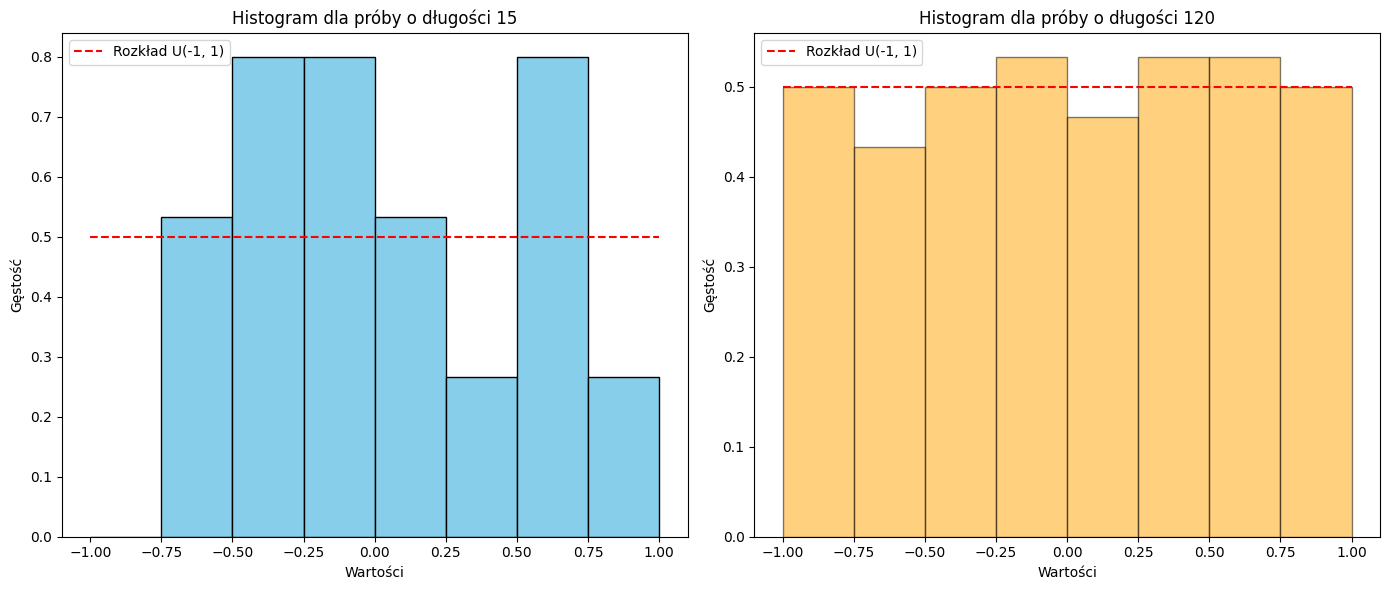

In [533]:
histogram(a,b)

Histogramy z Listy 2 :

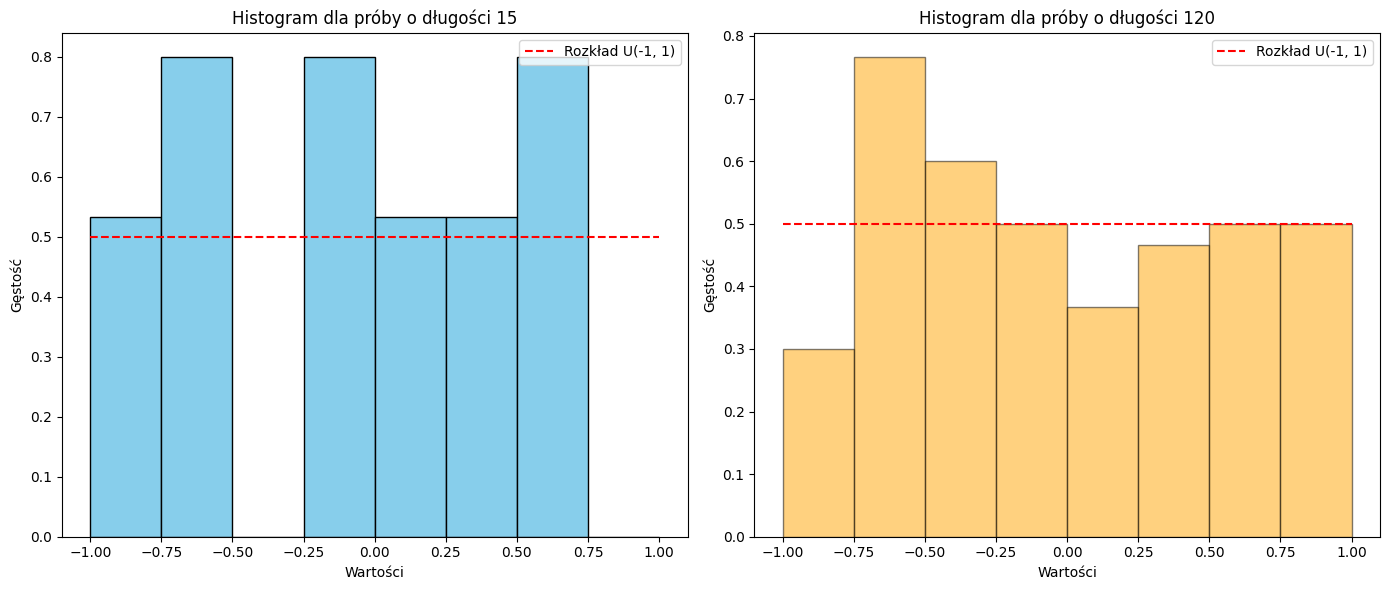

In [534]:
img = Image.open('Histograms.png')
display(img)

## Testy Statystyczne

### Test : Próby mają rozkład normalny

#### Próby z 15 elementaowe

Wyznaczanie statystyki tesowej i wartości p :

Próba 15 elementowa z tej listy :

In [535]:
stat15_1, p_value15_1 = shapiro(a)

In [536]:
print(f"Statystyka testowa = {stat15_1}, wartość p = {p_value15_1}")

Statystyka testowa = 0.9283635064991577, wartość p = 0.2578975242464523


Próba 15 elementowa z listy 2 :

In [537]:
stat15_2, p_value15_2 = shapiro(a2)

In [538]:
print(f"Statystyka testowa = {stat15_2}, wartość p = {p_value15_2}")

Statystyka testowa = 0.939485987782873, wartość p = 0.3759508805388423


Wyniki :

In [539]:
if p_value15_1 < 0.05:
    print("Próba 15 elementowa nie ma rozkładu normalnego")
else:
    print("Próba 15 elementowa ma rozkład normalny")

Próba 15 elementowa ma rozkład normalny


In [540]:
if p_value15_2 < 0.05:
    print("Próba 15 elementowa z listy 2 nie ma rozkładu normalnego")
else:
    print("Próba 15 elementowa z listy 2 ma rozkład normalny")

Próba 15 elementowa z listy 2 ma rozkład normalny


#### Próby 120 elementowe

Wyznaczanie statystyki testowej i wartości p :

Dla próby z tej listy :

In [541]:
stat120_1, p_value120_1 = shapiro(b)

In [542]:
print(f"Statystyka testowa = {stat120_1}, wartość p = {p_value120_1}")

Statystyka testowa = 0.9557961916311608, wartość p = 0.0005901536062998239


Dla próby z listy 2 : 

In [543]:
stat120_2, p_value120_2 = shapiro(b2)

In [544]:
print(f"Statystyka testowa = {stat120_2}, wartość p = {p_value120_2}")

Statystyka testowa = 0.9576396654213976, wartość p = 0.0008215125173178324


Wyniki :

In [545]:
if p_value120_1 < 0.05:
    print("Próba 120 elementowa nie ma rozkładu normalnego")
else:
    print("Próba 120 elementowa ma rozkład normalny")

Próba 120 elementowa nie ma rozkładu normalnego


In [546]:
if p_value120_2 < 0.05:
    print("Próba 120 elementowa z listy 2 nie ma rozkładu normalnego")
else:
    print("Próba 120 elementowa z listy 2 ma rozkład normalny")

Próba 120 elementowa z listy 2 nie ma rozkładu normalnego


### Średnie prób z tej listy oraz listy 2 są równe

#### Próby 15 elementowe 

Test Shapiro wilka nie odrzucił hipotezy, że na poziomie istotności 0.05 obydwie próby 15 elementowe z dwóch list posiadają rozkład normalny.   
Więc można zrobić test studenta dla prób niezależnych : 


H0 : Średnie dwóch prób są równe  
HA : Średnie dwóch prób nie są równe 

Poziom istotności : 0.05

Obliczanie statystyki testowej i wartości p : 

In [547]:
stat15_srednie, p_srednie = ttest_ind(a,a2)

In [548]:
print(f"Statystyka testowa = {stat15_srednie}, wartość p = {p_srednie}")

Statystyka testowa = -1.2686210993387883, wartość p = 0.21502222350996053


Wyniki :

In [549]:
if p_srednie < 0.05:
    print("Odrzucamy hipoteze zerową, średnie prób 15 elementowych z tej listy i listy 2 nie są równe")
else: 
    print("Nie ma podstaw do odrzucenia hipotezy zerowej, średnie prób 15 elementowych z tej listy i listy 2 są równe")

Nie ma podstaw do odrzucenia hipotezy zerowej, średnie prób 15 elementowych z tej listy i listy 2 są równe


#### Próby 120 elementowe

Test Shapiro na poziomie istotności 0.05, odrzucił hipotezę, że obie próby 120 elementowe mają rozkład normalny.  
Więc wykonuję test nieparametryczny Manna - Whitneya dla prób niezależnych: 

Obliczanie statystyki testowej i wartości p :

In [550]:
stat120_srednie, p_srednie_120 = mannwhitneyu(b, b2, alternative='two-sided')

In [551]:
print(f"Statystyka testowa = {stat120_srednie}, wartość p = {p_srednie_120}")

Statystyka testowa = 6401.0, wartość p = 0.1375849487008482


Wyniki :

In [552]:
if p_srednie_120 < 0.05:
    print("Odrzucamy hipoteze zerową, średnie prób 120 elementowych z tej listy i listy 2 nie są równe")
else: 
    print("Nie ma podstaw do odrzucenia hipotezy zerowej, średnie prób 120 elementowych z tej listy i listy 2 są równe")

Nie ma podstaw do odrzucenia hipotezy zerowej, średnie prób 120 elementowych z tej listy i listy 2 są równe


### Test : Średnie z prób równe 0

H0 - Średnia z próby równa 0  
HA - Średnia z próby różna od 0

#### Próba 15 elementowa z tej listy

Test shapiro wilka nie wykluczył hipotezy, że próba 15 elementowa ma rozkład normalny.  
Więc wykonuję test t studenta dla jednej próby.  
Pozniom istotności : 0.05

Wynik statystyki testowej (liczba po lewej) rozkładu t-studenta dla ciągu 15 elementowego i wartości p (liczna po prawej)

In [553]:
aw = t_value(15,statystyki(a)['std'],statystyki(a)['mean'],0)
aw

(np.float64(0.24846243117966627), np.float64(0.8073842496116159))

Wyniki :

In [554]:
if aw[1] < 0.05:
    print("Odrzucamy H0 i przyjmujemy alternatywną, średnie są różne od 0")
else:
    print("Nie ma wystarczających dowodów aby odrzucić H0, średnie są równe 0")

Nie ma wystarczających dowodów aby odrzucić H0, średnie są równe 0


#### Próba 120 elementowa z tej listy

Test shapiro wilka odrzucił hipotezę, że próba 120 elementowa ma rozkład normalny.  
Więc wykonuję test nieparametryczny wilcoxon'a dla jednej próby.  
Poziom istotności 0.05 

Obliczanie statystyki testowej i wartości p :

In [555]:
stat_0, p_value_0 = wilcoxon(b)

In [556]:
print(f"Statystyka testowa = {stat_0}, wartość p = {p_value_0}")

Statystyka testowa = 3500.0, wartość p = 0.9775021896560724


Wyniki : 

In [557]:
if  p_value_0 < 0.05:
    print("Odrzucamy H0 i przyjmujemy alternatywną, średnie są różne 0")
else:
    print("Nie ma wystarczających dowodów aby odrzucić H0, średnie są równe 0")

Nie ma wystarczających dowodów aby odrzucić H0, średnie są równe 0


## Wnioski

Ciągi a i b z tej listy, nieznacznie różnią się wartościami statystyki opisowej od swoich odpowiedników z listy 2.    
Na histogramach lepiej dopasowują się do funkcji gęstości rozkładu równomiernego U(-1;1) od swoich odpowiedników z listy 2  
Test statystyczny na poziomie istotności 0.05 dla prób 15 elementowych nie odrzucił hipotezy, że dane mają rozkład normalny,  
jednak dla prób 120 elementowych już tak. Może to wynikać z różnicy liczności tych prób.  
testy również nie odrzucają hipotezy, że próby z tej listy mają średnią = 0, oraz średnie prób z tej listy oraz listy 2 mają równe średnie na poziomie  
istotności 0.05 
